In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'D:\Jupyter\Ground water level prediction(Towfiq Sir)\final_data_updated.xlsx')

df

,Date,Rangpur_Tave,Saidpur_Tave,Dinajpur_Tave,Rangpur_PRCP,Saidpur_PRCP,Dinajpur_PRCP,Rangpur_NDVI,Saidpur_NDVI,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value,Rangpur-27 Satgora Mistripara (Rangpur Sadar)
0,01.01.1993,15.1,16.5,14.8,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925,3.286
1,02.01.1993,15.1,16.5,14.8,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925,3.286
2,03.01.1993,15.1,16.5,14.8,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925,3.286
3,04.01.1993,15.1,16.5,14.8,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925,3.286
4,05.01.1993,15.1,16.5,14.8,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925,3.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,22.6,17.4,24.6,0,0,0,0.1372,0.1267,0.1329,-0.204937,-1.4,-0.85,-0.404,2.800
9127,28.12.2017,22.6,17.4,24.6,0,0,0,0.1372,0.1267,0.1329,-0.204937,-1.4,-0.85,-0.404,2.800
9128,29.12.2017,22.6,17.4,24.6,0,0,0,0.1372,0.1267,0.1329,-0.204937,-1.4,-0.85,-0.404,2.800
9129,30.12.2017,22.6,17.4,24.6,0,0,0,0.1372,0.1267,0.1329,-0.204937,-1.4,-0.85,-0.404,2.800


In [3]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [4]:
checker.check_missing_values()

No missing values found in DataFrame


In [5]:
print(df.columns)


Index(['Date', 'Rangpur_Tave', 'Saidpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP',
       'Saidpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Saidpur_NDVI',
       'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value',
       'Rangpur-27 Satgora Mistripara (Rangpur Sadar)'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           9131 non-null   object 
 1   Rangpur_Tave                                   9131 non-null   float64
 2   Saidpur_Tave                                   9131 non-null   float64
 3   Dinajpur_Tave                                  9131 non-null   float64
 4   Rangpur_PRCP                                   9131 non-null   float64
 5   Saidpur_PRCP                                   9131 non-null   float64
 6   Dinajpur_PRCP                                  9131 non-null   float64
 7   Rangpur_NDVI                                   9131 non-null   float64
 8   Saidpur_NDVI                                   9131 non-null   float64
 9   Dinajpur_NDVI                                  9131 

In [8]:
# Assuming df is your DataFrame
cols_to_convert = df.columns.difference(['Date'])

df[cols_to_convert] = df[cols_to_convert].astype(float)


In [9]:
df["Rangpur-27 Satgora Mistripara (Rangpur Sadar)"].describe()

count    9131.000000
mean        3.089596
std         0.660229
min         1.212500
25%         2.647500
50%         3.125000
75%         3.550000
max         4.750000
Name: Rangpur-27 Satgora Mistripara (Rangpur Sadar), dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

df_train = df.loc[df['Date'].dt.year <= 2012]
df_test = df.loc[df['Date'].dt.year >= 2013]

X_train = df_train.drop(columns=['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Date']).to_numpy()
y_train = df_train['Rangpur-27 Satgora Mistripara (Rangpur Sadar)'].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import make_pipeline

# Initialize different base models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(random_state=42)

ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
gaussian_process = GaussianProcessRegressor()

# Additional models
krr = KernelRidge()
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_kernel = make_pipeline(StandardScaler(), PolynomialFeatures(3), LinearRegression())
rbf_kernel = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=None, n_restarts_optimizer=10, random_state=42))
gpr = GaussianProcessRegressor(random_state=42)

weighted_knn = KNeighborsRegressor(weights='distance')

# Train each base model on the training set
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)

# Train additional models
krr.fit(X_train, y_train)
poly_reg.fit(X_train, y_train)
poly_kernel.fit(X_train, y_train)
rbf_kernel.fit(X_train, y_train)
gpr.fit(X_train, y_train)

weighted_knn.fit(X_train, y_train)

# Evaluate the performance of each model on the validation set

# Linear Regression
linear_pred = linear_regression.predict(X_val)
linear_rmse = mean_squared_error(y_val, linear_pred, squared=False)
linear_mae = mean_absolute_error(y_val, linear_pred)
linear_r2 = r2_score(y_val, linear_pred)

# Decision Tree
dt_pred = decision_tree.predict(X_val)
dt_rmse = mean_squared_error(y_val, dt_pred, squared=False)
dt_mae = mean_absolute_error(y_val, dt_pred)
dt_r2 = r2_score(y_val, dt_pred)

# Random Forest
rf_pred = random_forest.predict(X_val)
rf_rmse = mean_squared_error(y_val, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_val, rf_pred)
rf_r2 = r2_score(y_val, rf_pred)

# Ridge Regression
ridge_pred = ridge.predict(X_val)
ridge_rmse = mean_squared_error(y_val, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_val, ridge_pred)
ridge_r2 = r2_score(y_val, ridge_pred)

# Lasso Regression
lasso_pred = lasso.predict(X_val)
lasso_rmse = mean_squared_error(y_val, lasso_pred, squared=False)
lasso_mae = mean_absolute_error(y_val, lasso_pred)
lasso_r2 = r2_score(y_val, lasso_pred)

# ElasticNet Regression
enet_pred = elastic_net.predict(X_val)
enet_rmse = mean_squared_error(y_val, enet_pred, squared=False)
enet_mae = mean_absolute_error(y_val, enet_pred)
enet_r2 = r2_score(y_val, enet_pred)

# K-Nearest Neighbors
knn_pred = knn.predict(X_val)
knn_rmse = mean_squared_error(y_val, knn_pred, squared=False)
knn_mae = mean_absolute_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)

# Gaussian Process
gp_pred = gaussian_process.predict(X_val)
gp_rmse = mean_squared_error(y_val, gp_pred, squared=False)
gp_mae = mean_absolute_error(y_val, gp_pred)
gp_r2 = r2_score(y_val, gp_pred)

# KRR (Kernel Ridge Regression)
krr_pred = krr.predict(X_val)
krr_rmse = mean_squared_error(y_val, krr_pred, squared=False)
krr_mae = mean_absolute_error(y_val, krr_pred)
krr_r2 = r2_score(y_val, krr_pred)

# Poly Regression
poly_reg_pred = poly_reg.predict(X_val)
poly_reg_rmse = mean_squared_error(y_val, poly_reg_pred, squared=False)
poly_reg_mae = mean_absolute_error(y_val, poly_reg_pred)
poly_reg_r2 = r2_score(y_val, poly_reg_pred)

# Poly Kernel
poly_kernel_pred = poly_kernel.predict(X_val)
poly_kernel_rmse = mean_squared_error(y_val, poly_kernel_pred, squared=False)
poly_kernel_mae = mean_absolute_error(y_val, poly_kernel_pred)
poly_kernel_r2 = r2_score(y_val, poly_kernel_pred)

# RBF Kernel
rbf_kernel_pred = rbf_kernel.predict(X_val)
rbf_kernel_rmse = mean_squared_error(y_val, rbf_kernel_pred, squared=False)
rbf_kernel_mae = mean_absolute_error(y_val, rbf_kernel_pred)
rbf_kernel_r2 = r2_score(y_val, rbf_kernel_pred)

# GPR (Gaussian Process Regression)
gpr_pred = gpr.predict(X_val)
gpr_rmse = mean_squared_error(y_val, gpr_pred, squared=False)
gpr_mae = mean_absolute_error(y_val, gpr_pred)
gpr_r2 = r2_score(y_val, gpr_pred)

# Weighted K-NN
wknn_pred = weighted_knn.predict(X_val)
wknn_rmse = mean_squared_error(y_val, wknn_pred, squared=False)
wknn_mae = mean_absolute_error(y_val, wknn_pred)
wknn_r2 = r2_score(y_val, wknn_pred)

# Print the evaluation metrics for each model
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)
print("ElasticNet RMSE:", enet_rmse)
print("KNN RMSE:", knn_rmse)
print("Gaussian Process RMSE:", gp_rmse)
print("KRR RMSE:", krr_rmse)
print("Poly Regression RMSE:", poly_reg_rmse)
print("Poly Kernel RMSE:", poly_kernel_rmse)
print("RBF Kernel RMSE:", rbf_kernel_rmse)
print("GPR RMSE:", gpr_rmse)

print("Weighted K-NN RMSE:", wknn_rmse)

print()

print("Linear Regression MAE:", linear_mae)
print("Decision Tree MAE:", dt_mae)
print("Random Forest MAE:", rf_mae)
print("Ridge MAE:", ridge_mae)
print("Lasso MAE:", lasso_mae)
print("ElasticNet MAE:", enet_mae)
print("KNN MAE:", knn_mae)
print("Gaussian Process MAE:", gp_mae)
print("KRR MAE:", krr_mae)
print("Poly Regression MAE:", poly_reg_mae)
print("Poly Kernel MAE:", poly_kernel_mae)
print("RBF Kernel MAE:", rbf_kernel_mae)
print("GPR MAE:", gpr_mae)

print("Weighted K-NN MAE:", wknn_mae)

print()

print("Linear Regression R-squared:", linear_r2)
print("Decision Tree R-squared:", dt_r2)
print("Random Forest R-squared:", rf_r2)
print("Ridge R-squared:", ridge_r2)
print("Lasso R-squared:", lasso_r2)
print("ElasticNet R-squared:", enet_r2)
print("KNN R-squared:", knn_r2)
print("Gaussian Process R-squared:", gp_r2)
print("KRR R-squared:", krr_r2)
print("Poly Regression R-squared:", poly_reg_r2)
print("Poly Kernel R-squared:", poly_kernel_r2)
print("RBF Kernel R-squared:", rbf_kernel_r2)
print("GPR R-squared:", gpr_r2)
print("Weighted K-NN R-squared:", wknn_r2)


Linear Regression RMSE: 0.5252398577748207
Decision Tree RMSE: 1.0094950828885286e-15
Random Forest RMSE: 4.5129170688300314e-15
Ridge RMSE: 0.525636725173341
Lasso RMSE: 0.5794211837798098
ElasticNet RMSE: 0.5765264064293609
KNN RMSE: 1.6151202582352662e-16
Gaussian Process RMSE: 1.3658267901830649e-11
KRR RMSE: 0.6677680767471339
Poly Regression RMSE: 1.0746791480183732e-09
Poly Kernel RMSE: 1.6127342607400202e-14
RBF Kernel RMSE: 8.402295816463806e-12
GPR RMSE: 1.3658267901830649e-11
Weighted K-NN RMSE: 1.6151202582352662e-16

Linear Regression MAE: 0.4301970879180674
Decision Tree MAE: 7.781439953567147e-16
Random Forest MAE: 3.731747590232183e-15
Ridge MAE: 0.429759090595957
Lasso MAE: 0.46930806248591433
ElasticNet MAE: 0.46781959878599694
KNN MAE: 6.094448088633645e-17
Gaussian Process MAE: 1.321696512977017e-11
KRR MAE: 0.5472198543633127
Poly Regression MAE: 7.808222077123835e-10
Poly Kernel MAE: 1.2373097451168137e-14
RBF Kernel MAE: 7.30005059367716e-12
GPR MAE: 1.3216965129

In [29]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tbats import TBATS
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import AdaBoostRegressor



random_state = 42 

# Initialize different base models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(random_state=random_state)
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
gaussian_process = GaussianProcessRegressor()
krr = KernelRidge()
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_kernel = make_pipeline(StandardScaler(), PolynomialFeatures(3), LinearRegression())
rbf_kernel = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=None, n_restarts_optimizer=10, random_state=random_state))
gpr = GaussianProcessRegressor(random_state=random_state)
weighted_knn = KNeighborsRegressor(weights='distance')
lightgbm = LGBMRegressor(random_state=random_state)
catboost = CatBoostRegressor(random_state=random_state, verbose=0)
xgb_model = XGBRegressor()
lgb_regressor = lgb.LGBMRegressor()
gbr = GradientBoostingRegressor(random_state=random_state)
abr = AdaBoostRegressor(random_state=random_state)
svr = SVR()

# Train each base model on the training set
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
krr.fit(X_train, y_train)
poly_reg.fit(X_train, y_train)
poly_kernel.fit(X_train, y_train)
rbf_kernel.fit(X_train, y_train)
gpr.fit(X_train, y_train)
weighted_knn.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_regressor.fit(X_train, y_train)
gbr.fit(X_train, y_train)
abr.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Train and evaluate Linear Regression
linear_pred_val = linear_regression.predict(X_val)
linear_rmse_val = mean_squared_error(y_val, linear_pred_val, squared=False)
linear_mae_val = mean_absolute_error(y_val, linear_pred_val)
linear_r2_val = r2_score(y_val, linear_pred_val)

# Train and evaluate Decision Tree
dt_pred_val = decision_tree.predict(X_val)
dt_rmse_val = mean_squared_error(y_val, dt_pred_val, squared=False)
dt_mae_val = mean_absolute_error(y_val, dt_pred_val)
dt_r2_val = r2_score(y_val, dt_pred_val)

# Train and evaluate Random Forest
rf_pred_val = random_forest.predict(X_val)
rf_rmse_val = mean_squared_error(y_val, rf_pred_val, squared=False)
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Train and evaluate Ridge Regression
ridge_pred_val = ridge.predict(X_val)
ridge_rmse_val = mean_squared_error(y_val, ridge_pred_val, squared=False)
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)

# Train and evaluate Lasso Regression
lasso_pred_val = lasso.predict(X_val)
lasso_rmse_val = mean_squared_error(y_val, lasso_pred_val, squared=False)
lasso_mae_val = mean_absolute_error(y_val, lasso_pred_val)
lasso_r2_val = r2_score(y_val, lasso_pred_val)

# Train and evaluate ElasticNet Regression
enet_pred_val = elastic_net.predict(X_val)
enet_rmse_val = mean_squared_error(y_val, enet_pred_val, squared=False)
enet_mae_val = mean_absolute_error(y_val, enet_pred_val)
enet_r2_val = r2_score(y_val, enet_pred_val)

# Train and evaluate K-Nearest Neighbors
knn_pred_val = knn.predict(X_val)
knn_rmse_val = mean_squared_error(y_val, knn_pred_val, squared=False)
knn_mae_val = mean_absolute_error(y_val, knn_pred_val)
knn_r2_val = r2_score(y_val, knn_pred_val)

# Train and evaluate Gaussian Process
gp_pred_val = gaussian_process.predict(X_val)
gp_rmse_val = mean_squared_error(y_val, gp_pred_val, squared=False)
gp_mae_val = mean_absolute_error(y_val, gp_pred_val)
gp_r2_val = r2_score(y_val, gp_pred_val)

# Train and evaluate Kernel Ridge Regression

krr_pred_val = krr.predict(X_val)
krr_rmse_val = mean_squared_error(y_val, krr_pred_val, squared=False)
krr_mae_val = mean_absolute_error(y_val, krr_pred_val)
krr_r2_val = r2_score(y_val, krr_pred_val)

# Train and evaluate Polynomial Regression
poly_reg_pred_val = poly_reg.predict(X_val)
poly_reg_rmse_val = mean_squared_error(y_val, poly_reg_pred_val, squared=False)
poly_reg_mae_val = mean_absolute_error(y_val, poly_reg_pred_val)
poly_reg_r2_val = r2_score(y_val, poly_reg_pred_val)

# Train and evaluate Poly Kernel
poly_kernel_pred_val = poly_kernel.predict(X_val)
poly_kernel_rmse_val = mean_squared_error(y_val, poly_kernel_pred_val, squared=False)
poly_kernel_mae_val = mean_absolute_error(y_val, poly_kernel_pred_val)
poly_kernel_r2_val = r2_score(y_val, poly_kernel_pred_val)

# Train and evaluate RBF Kernel
rbf_kernel_pred_val = rbf_kernel.predict(X_val)
rbf_kernel_rmse_val = mean_squared_error(y_val, rbf_kernel_pred_val, squared=False)
rbf_kernel_mae_val = mean_absolute_error(y_val, rbf_kernel_pred_val)
rbf_kernel_r2_val = r2_score(y_val, rbf_kernel_pred_val)

# Train and evaluate Gaussian Process Regression
gpr_pred_val = gpr.predict(X_val)
gpr_rmse_val = mean_squared_error(y_val, gpr_pred_val, squared=False)
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)

# Train and evaluate Weighted K-NN
wknn_pred_val = weighted_knn.predict(X_val)
wknn_rmse_val = mean_squared_error(y_val, wknn_pred_val, squared=False)
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)

# Train and evaluate Gradient Boosting Regressor
gbr_pred_val = gbr.predict(X_val)
gbr_rmse_val = mean_squared_error(y_val, gbr_pred_val, squared=False)
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)

# Train and evaluate AdaBoost Regressor
abr_pred_val = abr.predict(X_val)
abr_rmse_val = mean_squared_error(y_val, abr_pred_val, squared=False)
abr_mae_val = mean_absolute_error(y_val, abr_pred_val)
abr_r2_val = r2_score(y_val, abr_pred_val)

# Train and evaluate LightGBM Regressor
lightgbm_pred_val = lightgbm.predict(X_val)
lightgbm_rmse_val = mean_squared_error(y_val, lightgbm_pred_val, squared=False)
lightgbm_mae_val = mean_absolute_error(y_val, lightgbm_pred_val)
lightgbm_r2_val = r2_score(y_val, lightgbm_pred_val)

# Train and evaluate CatBoost Regressor
catboost_pred_val = catboost.predict(X_val)
catboost_rmse_val = mean_squared_error(y_val, catboost_pred_val, squared=False)
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)

# Train and evaluate XGBoost
xgb_pred_val = xgb_model.predict(X_val)
xgb_rmse_val = mean_squared_error(y_val, xgb_pred_val, squared=False)
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)

# Train and evaluate LightGBM Regressor
lgb_pred_val = lgb_regressor.predict(X_val)
lgb_rmse_val = mean_squared_error(y_val, lgb_pred_val, squared=False)
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)

# Train and evaluate SVR

svr_pred_val = svr.predict(X_val)
svr_rmse_val = mean_squared_error(y_val, svr_pred_val, squared=False)
svr_mae_val = mean_absolute_error(y_val, svr_pred_val)
svr_r2_val = r2_score(y_val, svr_pred_val)

# Print evaluation metrics for each model on the validation set

# Print the evaluation metrics for each model
print("Linear Regression RMSE:", linear_rmse_val)
print("Decision Tree RMSE:", dt_rmse_val)
print("Random Forest RMSE:", rf_rmse_val)
print("Ridge Regression RMSE:", ridge_rmse_val)
print("Lasso Regression RMSE:", lasso_rmse_val)
print("ElasticNet Regression RMSE:", enet_rmse_val)
print("K-Nearest Neighbors RMSE:", knn_rmse_val)
print("Gaussian Process RMSE:", gp_rmse_val)
print("Kernel Ridge Regression RMSE:", krr_rmse_val)
print("Polynomial Regression RMSE:", poly_reg_rmse_val)
print("Poly Kernel RMSE:", poly_kernel_rmse_val)
print("RBF Kernel RMSE:", rbf_kernel_rmse_val)
print("Gaussian Process Regression RMSE:", gpr_rmse_val)
print("Weighted K-NN RMSE:", wknn_rmse_val)
print("Gradient Boosting Regressor RMSE:", gbr_rmse_val)
print("AdaBoost Regressor RMSE:", abr_rmse_val)
print("LightGBM Regressor RMSE:", lightgbm_rmse_val)
print("CatBoost Regressor RMSE:", catboost_rmse_val)
print("XGBoost RMSE:", xgb_rmse_val)
print("LightGBM Regressor RMSE:", lgb_rmse_val)
print("SVR RMSE:", svr_rmse_val)
print()

print("Linear Regression MAE:", linear_mae_val)
print("Decision Tree MAE:", dt_mae_val)
print("Random Forest MAE:", rf_mae_val)
print("Ridge Regression MAE:", ridge_mae_val)
print("Lasso Regression MAE:", lasso_mae_val)
print("ElasticNet Regression MAE:", enet_mae_val)
print("K-Nearest Neighbors MAE:", knn_mae_val)
print("Gaussian Process MAE:", gp_mae_val)
print("Kernel Ridge Regression MAE:", krr_mae_val)
print("Polynomial Regression MAE:", poly_reg_mae_val)
print("Poly Kernel MAE:", poly_kernel_mae_val)
print("RBF Kernel MAE:", rbf_kernel_mae_val)
print("Gaussian Process Regression MAE:", gpr_mae_val)
print("Weighted K-NN MAE:", wknn_mae_val)
print("Gradient Boosting Regressor MAE:", gbr_mae_val)
print("AdaBoost Regressor MAE:", abr_mae_val)
print("LightGBM Regressor MAE:", lightgbm_mae_val)
print("CatBoost Regressor MAE:", catboost_mae_val)
print("XGBoost MAE:", xgb_mae_val)
print("LightGBM Regressor MAE:", lgb_mae_val)
print("SVR MAE:", svr_mae_val)
print()

print("Linear Regression R-squared:", linear_r2_val)
print("Decision Tree R-squared:", dt_r2_val)
print("Random Forest R-squared:", rf_r2_val)
print("Ridge Regression R-squared:", ridge_r2_val)
print("Lasso Regression R-squared:", lasso_r2_val)
print("ElasticNet Regression R-squared:", enet_r2_val)
print("K-Nearest Neighbors R-squared:", knn_r2_val)
print("Gaussian Process R-squared:", gp_r2_val)
print("Kernel Ridge Regression R-squared:", krr_r2_val)
print("Polynomial Regression R-squared:", poly_reg_r2_val)
print("Poly Kernel R-squared:", poly_kernel_r2_val)
print("RBF Kernel R-squared:", rbf_kernel_r2_val)
print("Gaussian Process Regression R-squared:", gpr_r2_val)
print("Weighted K-NN R-squared:", wknn_r2_val)
print("Gradient Boosting Regressor R-squared:", gbr_r2_val)
print("AdaBoost Regressor R-squared:", abr_r2_val)
print("LightGBM Regressor R-squared:", lightgbm_r2_val)
print("CatBoost Regressor R-squared:", catboost_r2_val)
print("XGBoost R-squared:", xgb_r2_val)
print("LightGBM Regressor R-squared:", lgb_r2_val)
print("SVR R-squared:", svr_r2_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2259
[LightGBM] [Info] Number of data points in the train set: 5844, number of used features: 13
[LightGBM] [Info] Start training from score 3.094913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2259
[LightGBM] [Info] Number of data points in the train set: 5844, number of used features: 13
[LightGBM] [Info] Start training from score 3.094913
Linear Regression RMSE: 0.5252398577748207
Decision Tree RMSE: 1.0094950828885286e-15
Random Forest RMSE: 4.5129170688300314e-15
Ridge Regression RMSE: 0.525636725173341
Lasso Regression RMSE: 0.5794211837798098
ElasticNet Regression RMSE: 0.576526406429

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors to consider
num_neighbors = 5  # You can adjust this value

# Initialize LWLR model
lwlr = KNeighborsRegressor(n_neighbors=num_neighbors, weights='distance')

# Train the LWLR model
lwlr.fit(X_train, y_train)

# Predict on validation set
lwlr_pred = lwlr.predict(X_val)

# Calculate metrics for LWLR
lwlr_rmse = mean_squared_error(y_val, lwlr_pred, squared=False)
lwlr_mae = mean_absolute_error(y_val, lwlr_pred)
lwlr_r2 = r2_score(y_val, lwlr_pred)

# Print the evaluation metrics for LWLR
print("LWLR RMSE:", lwlr_rmse)
print("LWLR MAE:", lwlr_mae)
print("LWLR R-squared:", lwlr_r2)

LWLR RMSE: 1.6151202582352662e-16
LWLR MAE: 6.094448088633645e-17
LWLR R-squared: 1.0


# Hyper parameter tuning

# lwlr doesn't need hyper parameter tuning

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors to consider
param_grid_lwlr = {
    'n_neighbors': [3, 5, 7],  # You can adjust these values
    'weights': ['uniform', 'distance']  # You can adjust these values
}

# Initialize LWLR model
lwlr = KNeighborsRegressor()

# Initialize Grid Search for LWLR
grid_search_lwlr = GridSearchCV(lwlr, param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for LWLR
grid_search_lwlr.fit(X_train, y_train)

# Get the best hyperparameters and model for LWLR
best_lwlr = grid_search_lwlr.best_estimator_
best_params_lwlr = grid_search_lwlr.best_params_

# Predict on validation set using LWLR
lwlr_pred_val = best_lwlr.predict(X_val)

# Calculate metrics for LWLR on validation set
lwlr_rmse_val = mean_squared_error(y_val, lwlr_pred_val, squared=False)
lwlr_mae_val = mean_absolute_error(y_val, lwlr_pred_val)
lwlr_r2_val = r2_score(y_val, lwlr_pred_val)

# Print the best hyperparameters and evaluation metrics for LWLR on validation set
print("Best Hyperparameters for LWLR:", best_params_lwlr)
print("LWLR RMSE (Validation):", lwlr_rmse_val)
print("LWLR MAE (Validation):", lwlr_mae_val)
print("LWLR R-squared (Validation):", lwlr_r2_val)


Best Hyperparameters for LWLR: {'n_neighbors': 5, 'weights': 'uniform'}
LWLR RMSE (Validation): 1.6151202582352662e-16
LWLR MAE (Validation): 6.094448088633645e-17
LWLR R-squared (Validation): 1.0


### The KNeighborsRegressor (KNN) model doesn't have traditional hyperparameters like other models (e.g., Random Forest).However, I performed hyperparameter tuning for the Locally Weighted Linear Regression (LWLR) using Grid Search with a specified range of neighbors and weight options, ultimately finding the best hyperparameters and model for LWLR, and evaluating its performance on the validation set.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Random Forest model
random_forest = RandomForestRegressor()

# Define the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # You can adjust these values
    'max_depth': [None, 5, 10],      # You can adjust these values
    'min_samples_split': [2, 5, 10] # You can adjust these values
}

# Initialize Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculate metrics for Random Forest on validation set
rf_rmse_val = mean_squared_error(y_val, rf_pred_val, squared=False)
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Print the best hyperparameters and evaluation metrics for Random Forest on validation set
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest RMSE (Validation): 2.1639969900334522e-15
Random Forest MAE (Validation): 1.7565992770181463e-15
Random Forest R-squared (Validation): 1.0


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameters and their possible values for Ridge Regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# Initialize Ridge model
ridge = Ridge()

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_

# Predict on validation set using Ridge Regression
ridge_pred = best_ridge.predict(X_val)

# Calculate metrics for Ridge Regression
ridge_rmse = mean_squared_error(y_val, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_val, ridge_pred)
ridge_r2 = r2_score(y_val, ridge_pred)

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", best_params_ridge)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R-squared:", ridge_r2)


Best Hyperparameters for Ridge Regression: {'alpha': 0.1}
Ridge Regression RMSE: 0.5252708603644985
Ridge Regression MAE: 0.43014910996579553
Ridge Regression R-squared: 0.3765601780340646


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors and weights to consider
param_grid = {
    'n_neighbors': [3, 5, 7],  # You can adjust these values
    'weights': ['uniform', 'distance']
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Predict on validation set
knn_pred = best_knn.predict(X_val)

# Calculate metrics for KNN
knn_rmse = mean_squared_error(y_val, knn_pred, squared=False)
knn_mae = mean_absolute_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)

# Print the best hyperparameters and evaluation metrics for KNN
print("Best Hyperparameters for KNN:", best_params)
print("KNN RMSE:", knn_rmse)
print("KNN MAE:", knn_mae)
print("KNN R-squared:", knn_r2)


Best Hyperparameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
KNN RMSE: 1.6151202582352662e-16
KNN MAE: 6.094448088633645e-17
KNN R-squared: 1.0


In [17]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model
elastic_net = ElasticNet()

# Define the hyperparameters and their possible values for ElasticNet
param_grid_enet = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # You can adjust these values
    'l1_ratio': [0.1, 0.5, 0.9]         # You can adjust these values
}

# Initialize Grid Search for ElasticNet
grid_search_enet = GridSearchCV(elastic_net, param_grid_enet, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for ElasticNet
grid_search_enet.fit(X_train, y_train)

# Get the best hyperparameters and model for ElasticNet
best_enet = grid_search_enet.best_estimator_
best_params_enet = grid_search_enet.best_params_

# Predict on validation set using ElasticNet
enet_pred_val = best_enet.predict(X_val)

# Calculate metrics for ElasticNet on validation set
enet_rmse_val = mean_squared_error(y_val, enet_pred_val, squared=False)
enet_mae_val = mean_absolute_error(y_val, enet_pred_val)
enet_r2_val = r2_score(y_val, enet_pred_val)

# Print the best hyperparameters and evaluation metrics for ElasticNet on validation set
print("Best Hyperparameters for ElasticNet:", best_params_enet)
print("ElasticNet RMSE (Validation):", enet_rmse_val)
print("ElasticNet MAE (Validation):", enet_mae_val)
print("ElasticNet R-squared (Validation):", enet_r2_val)


Best Hyperparameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.9}
ElasticNet RMSE (Validation): 0.5272460410319655
ElasticNet MAE (Validation): 0.4293010122907717
ElasticNet R-squared (Validation): 0.3718627100770707


In [18]:
# Predictions from Random Forest and Ridge
rf_pred = best_rf.predict(X_val)
ridge_pred = best_ridge.predict(X_val)

# Define weights for Random Forest and Ridge predictions
weight_rf = 0.6  # You can adjust the weight based on performance
weight_ridge = 0.4

# Combine predictions using weighted averaging
hybrid1_pred = (weight_rf * rf_pred + weight_ridge * ridge_pred)

# Evaluate the performance of Hybrid Model 1
hybrid1_rmse = mean_squared_error(y_val, hybrid1_pred, squared=False)
hybrid1_mae = mean_absolute_error(y_val, hybrid1_pred)
hybrid1_r2 = r2_score(y_val, hybrid1_pred)

print("Hybrid Model 1 (Random Forest + Ridge) RMSE:", hybrid1_rmse)
print("Hybrid Model 1 (Random Forest + Ridge) MAE:", hybrid1_mae)
print("Hybrid Model 1 (Random Forest + Ridge) R-squared:", hybrid1_r2)

Hybrid Model 1 (Random Forest + Ridge) RMSE: 0.21010834414579938
Hybrid Model 1 (Random Forest + Ridge) MAE: 0.17205964398631823
Hybrid Model 1 (Random Forest + Ridge) R-squared: 0.9002496284854504


In [19]:
# Predictions from Random Forest, Ridge, KNN, and ElasticNet
rf_pred = best_rf.predict(X_val)
ridge_pred = best_ridge.predict(X_val)
knn_pred = best_knn.predict(X_val)
enet_pred = best_enet.predict(X_val)

# Define weights for Random Forest, Ridge, KNN, and ElasticNet predictions
weight_rf = 0.3  # Adjust as needed
weight_ridge = 0.2
weight_knn = 0.2
weight_enet = 0.3

# Combine predictions using weighted averaging
hybrid1_pred = (weight_rf * rf_pred + weight_ridge * ridge_pred)
hybrid2_pred = (weight_ridge * ridge_pred + weight_knn * knn_pred)
hybrid3_pred = (weight_rf * rf_pred + weight_knn * knn_pred + weight_enet * enet_pred)
hybrid4_pred = (weight_rf * rf_pred + weight_ridge * ridge_pred + weight_enet * enet_pred)
hybrid5_pred = (weight_rf * rf_pred + weight_ridge * ridge_pred + weight_knn * knn_pred + weight_enet * enet_pred)

# Evaluate the performance of each hybrid model
hybrid1_rmse = mean_squared_error(y_val, hybrid1_pred, squared=False)
hybrid1_mae = mean_absolute_error(y_val, hybrid1_pred)
hybrid1_r2 = r2_score(y_val, hybrid1_pred)

hybrid2_rmse = mean_squared_error(y_val, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_val, hybrid2_pred)
hybrid2_r2 = r2_score(y_val, hybrid2_pred)

hybrid3_rmse = mean_squared_error(y_val, hybrid3_pred, squared=False)
hybrid3_mae = mean_absolute_error(y_val, hybrid3_pred)
hybrid3_r2 = r2_score(y_val, hybrid3_pred)

hybrid4_rmse = mean_squared_error(y_val, hybrid4_pred, squared=False)
hybrid4_mae = mean_absolute_error(y_val, hybrid4_pred)
hybrid4_r2 = r2_score(y_val, hybrid4_pred)

hybrid5_rmse = mean_squared_error(y_val, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_val, hybrid5_pred)
hybrid5_r2 = r2_score(y_val, hybrid5_pred)

# Print the evaluation metrics for each hybrid model
print("Hybrid Model 1 (Random Forest + Ridge) RMSE:", hybrid1_rmse)
print("Hybrid Model 1 (Random Forest + Ridge) MAE:", hybrid1_mae)
print("Hybrid Model 1 (Random Forest + Ridge) R-squared:", hybrid1_r2)

print("Hybrid Model 2 (Ridge + KNN) RMSE:", hybrid2_rmse)
print("Hybrid Model 2 (Ridge + KNN) MAE:", hybrid2_mae)
print("Hybrid Model 2 (Ridge + KNN) R-squared:", hybrid2_r2)

print("Hybrid Model 3 (Random Forest + KNN + ElasticNet) RMSE:", hybrid3_rmse)
print("Hybrid Model 3 (Random Forest + KNN + ElasticNet) MAE:", hybrid3_mae)
print("Hybrid Model 3 (Random Forest + KNN + ElasticNet) R-squared:", hybrid3_r2)

print("Hybrid Model 4 (Random Forest + Ridge + ElasticNet) RMSE:", hybrid4_rmse)
print("Hybrid Model 4 (Random Forest + Ridge + ElasticNet) MAE:", hybrid4_mae)
print("Hybrid Model 4 (Random Forest + Ridge + ElasticNet) R-squared:", hybrid4_r2)

print("Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) RMSE:", hybrid5_rmse)
print("Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) MAE:", hybrid5_mae)
print("Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) R-squared:", hybrid5_r2)


Hybrid Model 1 (Random Forest + Ridge) RMSE: 1.6051755941967791
Hybrid Model 1 (Random Forest + Ridge) MAE: 1.5488872596673695
Hybrid Model 1 (Random Forest + Ridge) R-squared: -4.822010943541283
Hybrid Model 2 (Ridge + KNN) RMSE: 1.9214025590603607
Hybrid Model 2 (Ridge + KNN) MAE: 1.858600850163116
Hybrid Model 2 (Ridge + KNN) R-squared: -7.341893696918563
Hybrid Model 3 (Random Forest + KNN + ElasticNet) RMSE: 0.679799355671592
Hybrid Model 3 (Random Forest + KNN + ElasticNet) MAE: 0.6205715854934896
Hybrid Model 3 (Random Forest + KNN + ElasticNet) R-squared: -0.04421377702477591
Hybrid Model 4 (Random Forest + Ridge + ElasticNet) RMSE: 0.7273714103499683
Hybrid Model 4 (Random Forest + Ridge + ElasticNet) MAE: 0.6248922245305201
Hybrid Model 4 (Random Forest + Ridge + ElasticNet) R-squared: -0.1954746613412235
Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) RMSE: 0.2630990480580096
Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) MAE: 0.21474700467611943
Hybrid 

In [20]:
X_test = df.loc[(df['Date'].dt.year >= 1993) & (df['Date'].dt.year <= 2012)].drop(columns=['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Date']).to_numpy()
y_test = df.loc[(df['Date'].dt.year >= 1993) & (df['Date'].dt.year <= 2012)]['Rangpur-27 Satgora Mistripara (Rangpur Sadar)'].to_numpy()


In [22]:
# Load the best models (best_rf, best_ridge, best_knn, best_enet)

# Predict on Test Set
rf_test_pred = best_rf.predict(X_test)
ridge_test_pred = best_ridge.predict(X_test)
knn_test_pred = best_knn.predict(X_test)
enet_test_pred = best_enet.predict(X_test)

# Combine Predictions using the same weights
hybrid1_test_pred = (weight_rf * rf_test_pred + weight_ridge * ridge_test_pred)
hybrid2_test_pred = (weight_ridge * ridge_test_pred + weight_knn * knn_test_pred)
hybrid3_test_pred = (weight_rf * rf_test_pred + weight_knn * knn_test_pred + weight_enet * enet_test_pred)
hybrid4_test_pred = (weight_rf * rf_test_pred + weight_ridge * ridge_test_pred + weight_enet * enet_test_pred)
hybrid5_test_pred = (weight_rf * rf_test_pred + weight_ridge * ridge_test_pred + weight_knn * knn_test_pred + weight_enet * enet_test_pred)

# Evaluate the Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

hybrid1_test_rmse = mean_squared_error(y_test, hybrid1_test_pred, squared=False)
hybrid1_test_mae = mean_absolute_error(y_test, hybrid1_test_pred)
hybrid1_test_r2 = r2_score(y_test, hybrid1_test_pred)

# Repeat for hybrid2, hybrid3, hybrid4, and hybrid5
hybrid2_test_rmse = mean_squared_error(y_test, hybrid2_test_pred, squared=False)
hybrid2_test_mae = mean_absolute_error(y_test, hybrid2_test_pred)
hybrid2_test_r2 = r2_score(y_test, hybrid2_test_pred)

hybrid3_test_rmse = mean_squared_error(y_test, hybrid3_test_pred, squared=False)
hybrid3_test_mae = mean_absolute_error(y_test, hybrid3_test_pred)
hybrid3_test_r2 = r2_score(y_test, hybrid3_test_pred)

hybrid4_test_rmse = mean_squared_error(y_test, hybrid4_test_pred, squared=False)
hybrid4_test_mae = mean_absolute_error(y_test, hybrid4_test_pred)
hybrid4_test_r2 = r2_score(y_test, hybrid4_test_pred)

hybrid5_test_rmse = mean_squared_error(y_test, hybrid5_test_pred, squared=False)
hybrid5_test_mae = mean_absolute_error(y_test, hybrid5_test_pred)
hybrid5_test_r2 = r2_score(y_test, hybrid5_test_pred)

# Print the Evaluation Metrics
print("Hybrid Model 1 (Random Forest + Ridge) Test RMSE:", hybrid1_test_rmse)
print("Hybrid Model 1 (Random Forest + Ridge) Test MAE:", hybrid1_test_mae)
print("Hybrid Model 1 (Random Forest + Ridge) Test R-squared:", hybrid1_test_r2)

# Repeat for hybrid2, hybrid3, hybrid4, and hybrid5
print("Hybrid Model 2 (Ridge + KNN) Test RMSE:", hybrid2_test_rmse)
print("Hybrid Model 2 (Ridge + KNN) Test MAE:", hybrid2_test_mae)
print("Hybrid Model 2 (Ridge + KNN) Test R-squared:", hybrid2_test_r2)

print("Hybrid Model 3 (Random Forest + KNN + ElasticNet) Test RMSE:", hybrid3_test_rmse)
print("Hybrid Model 3 (Random Forest + KNN + ElasticNet) Test MAE:", hybrid3_test_mae)
print("Hybrid Model 3 (Random Forest + KNN + ElasticNet) Test R-squared:", hybrid3_test_r2)

print("Hybrid Model 4 (Random Forest + Ridge + ElasticNet) Test RMSE:", hybrid4_test_rmse)
print("Hybrid Model 4 (Random Forest + Ridge + ElasticNet) Test MAE:", hybrid4_test_mae)
print("Hybrid Model 4 (Random Forest + Ridge + ElasticNet) Test R-squared:", hybrid4_test_r2)

print("Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) Test RMSE:", hybrid5_test_rmse)
print("Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) Test MAE:", hybrid5_test_mae)
print("Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) Test R-squared:", hybrid5_test_r2)


Hybrid Model 1 (Random Forest + Ridge) Test RMSE: 1.599382488204073
Hybrid Model 1 (Random Forest + Ridge) Test MAE: 1.5477426906805882
Hybrid Model 1 (Random Forest + Ridge) Test R-squared: -5.339631769813618
Hybrid Model 2 (Ridge + KNN) Test RMSE: 1.914853549062054
Hybrid Model 2 (Ridge + KNN) Test MAE: 1.8572784565291591
Hybrid Model 2 (Ridge + KNN) Test R-squared: -8.087208402453117
Hybrid Model 3 (Random Forest + KNN + ElasticNet) Test RMSE: 0.6740356461155996
Hybrid Model 3 (Random Forest + KNN + ElasticNet) Test MAE: 0.6193004125975411
Hybrid Model 3 (Random Forest + KNN + ElasticNet) Test R-squared: -0.12596551419526292
Hybrid Model 4 (Random Forest + Ridge + ElasticNet) Test RMSE: 0.7183055515844832
Hybrid Model 4 (Random Forest + Ridge + ElasticNet) Test MAE: 0.6231336418179945
Hybrid Model 4 (Random Forest + Ridge + ElasticNet) Test R-squared: -0.27872691359889723
Hybrid Model 5 (Random Forest + Ridge + KNN + ElasticNet) Test RMSE: 0.2533487222496363
Hybrid Model 5 (Random F

In [23]:
rf_test_pred = best_rf.predict(X_test)
ridge_test_pred = best_ridge.predict(X_test)
weight_rf = 0.6
weight_ridge = 0.4

hybrid1_test_pred = (weight_rf * rf_test_pred + weight_ridge * ridge_test_pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

hybrid1_test_rmse = mean_squared_error(y_test, hybrid1_test_pred, squared=False)
hybrid1_test_mae = mean_absolute_error(y_test, hybrid1_test_pred)
hybrid1_test_r2 = r2_score(y_test, hybrid1_test_pred)
print("Hybrid Model 1 (Random Forest + Ridge) Test RMSE:", hybrid1_test_rmse)
print("Hybrid Model 1 (Random Forest + Ridge) Test MAE:", hybrid1_test_mae)
print("Hybrid Model 1 (Random Forest + Ridge) Test R-squared:", hybrid1_test_r2)

Hybrid Model 1 (Random Forest + Ridge) Test RMSE: 0.2024489250271225
Hybrid Model 1 (Random Forest + Ridge) Test MAE: 0.16521610389634245
Hybrid Model 1 (Random Forest + Ridge) Test R-squared: 0.898424186282403


In [24]:
# Assuming X_test is already defined and contains your test data
enet_pred_test = best_enet.predict(X_test)
# Assuming y_test is already defined and contains the true values for your test set
enet_rmse_test = mean_squared_error(y_test, enet_pred_test, squared=False)
enet_mae_test = mean_absolute_error(y_test, enet_pred_test)
enet_r2_test = r2_score(y_test, enet_pred_test)
print("ElasticNet RMSE (Test):", enet_rmse_test)
print("ElasticNet MAE (Test):", enet_mae_test)
print("ElasticNet R-squared (Test):", enet_r2_test)

ElasticNet RMSE (Test): 0.507546478653209
ElasticNet MAE (Test): 0.4118876510381714
ElasticNet R-squared (Test): 0.36157336413874686


In [25]:
# Assuming X_test is already defined and contains your test data
rf_test_pred = best_rf.predict(X_test)
ridge_test_pred = best_ridge.predict(X_test)

# Define weights for Random Forest and Ridge predictions
weight_rf = 0.6
weight_ridge = 0.4

# Combine predictions using weighted averaging
hybrid1_test_pred = (weight_rf * rf_test_pred + weight_ridge * ridge_test_pred)
# Assuming y_test is already defined and contains the true values for your test set
hybrid1_test_rmse = mean_squared_error(y_test, hybrid1_test_pred, squared=False)
hybrid1_test_mae = mean_absolute_error(y_test, hybrid1_test_pred)
hybrid1_test_r2 = r2_score(y_test, hybrid1_test_pred)
print("Hybrid Model 1 (Random Forest + Ridge) Test RMSE:", hybrid1_test_rmse)
print("Hybrid Model 1 (Random Forest + Ridge) Test MAE:", hybrid1_test_mae)
print("Hybrid Model 1 (Random Forest + Ridge) Test R-squared:", hybrid1_test_r2)

Hybrid Model 1 (Random Forest + Ridge) Test RMSE: 0.2024489250271225
Hybrid Model 1 (Random Forest + Ridge) Test MAE: 0.16521610389634245
Hybrid Model 1 (Random Forest + Ridge) Test R-squared: 0.898424186282403


In [27]:
# Assuming X_test is already defined and contains your test data
rf_test_pred = best_rf.predict(X_test)
ridge_test_pred = best_ridge.predict(X_test)

# Define weights for Random Forest and Ridge predictions
weight_rf = 0.6
weight_ridge = 0.4

# Combine predictions using weighted averaging
hybrid1_test_pred = (weight_rf * rf_test_pred + weight_ridge * ridge_test_pred)
# Assuming y_test is already defined and contains the true values for your test set
hybrid1_test_rmse = mean_squared_error(y_test, hybrid1_test_pred, squared=False)
hybrid1_test_mae = mean_absolute_error(y_test, hybrid1_test_pred)
hybrid1_test_r2 = r2_score(y_test, hybrid1_test_pred)

# Print the test performance metrics
print("Hybrid Model 1 (Random Forest + Ridge) Test RMSE:", hybrid1_test_rmse)
print("Hybrid Model 1 (Random Forest + Ridge) Test MAE:", hybrid1_test_mae)
print("Hybrid Model 1 (Random Forest + Ridge) Test R-squared:", hybrid1_test_r2)

# Calculate RAE (%)
mean_actual = np.mean(y_test)
rae = (hybrid1_test_mae / mean_actual) * 100

# Calculate RRSE (%)
range_actual = np.max(y_test) - np.min(y_test)
rrse = (hybrid1_test_rmse / range_actual) * 100

# Calculate CC
cc = np.corrcoef(y_test, hybrid1_test_pred)[0, 1]

# Print the values
print(f"RAE (%): {rae:.2f}")
print(f"RRSE (%): {rrse:.2f}")
print(f"CC: {cc:.2f}")


Hybrid Model 1 (Random Forest + Ridge) Test RMSE: 0.2024489250271225
Hybrid Model 1 (Random Forest + Ridge) Test MAE: 0.16521610389634245
Hybrid Model 1 (Random Forest + Ridge) Test R-squared: 0.898424186282403
RAE (%): 5.34
RRSE (%): 6.32
CC: 0.97


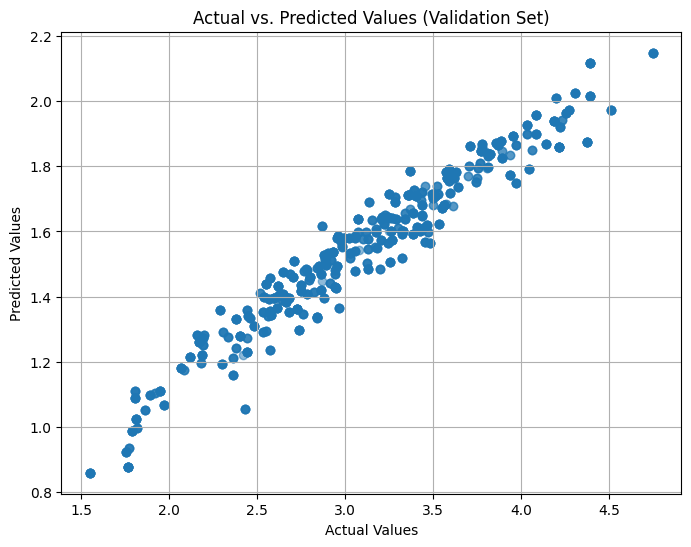

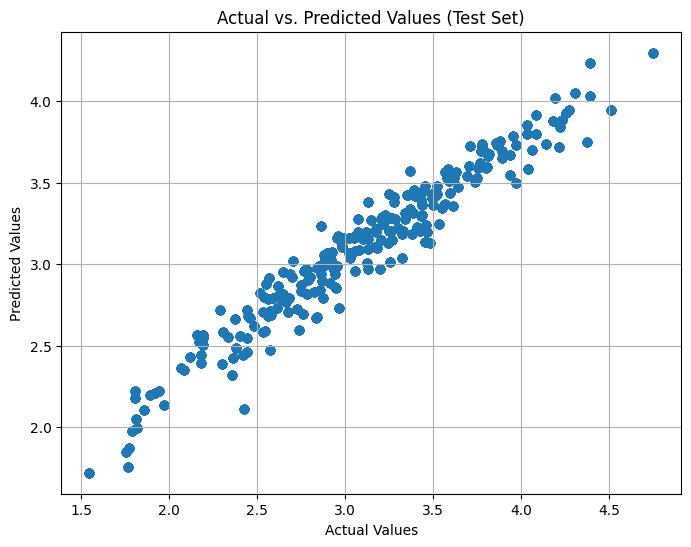

In [26]:
import matplotlib.pyplot as plt

# Assuming y_val is the actual target values and hybrid1_pred is the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, hybrid1_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.grid(True)
plt.show()

# For the test set
# Assuming y_test is the actual target values and hybrid1_test_pred is the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, hybrid1_test_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.grid(True)
plt.show()
